In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")


In [63]:
regular_cycle_data = pd.read_csv('dataset/regular_cycle_data.csv')
features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data, reshape=False)

In [65]:
n_features = input_train_regular_cycle.shape[2]
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(input_train_regular_cycle.shape[1], input_train_regular_cycle.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=n_features, activation='relu'))


2023-05-25 18:58:16.642015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 18:58:16.643923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 18:58:16.645680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [66]:
opt=tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt)
# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)

In [67]:
history = model.fit(input_train_regular_cycle, output_train_regular_cycle, epochs=2000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000


2023-05-25 18:58:17.863962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 18:58:17.866134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 18:58:17.867555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - ETA: 0s - loss: 510.2717

2023-05-25 18:58:22.269466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 18:58:22.282675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 18:58:22.288047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 5s 5s/step - loss: 510.2717 - val_loss: 493.2679
Epoch 2/2000
1/1 [==============================] - 0s 32ms/step - loss: 506.5592 - val_loss: 489.3393
Epoch 3/2000
1/1 [==============================] - 0s 33ms/step - loss: 502.3734 - val_loss: 485.2707
Epoch 4/2000
1/1 [==============================] - 0s 33ms/step - loss: 497.9018 - val_loss: 480.9848
Epoch 5/2000
1/1 [==============================] - 0s 32ms/step - loss: 495.7454 - val_loss: 476.4270
Epoch 6/2000
1/1 [==============================] - 0s 38ms/step - loss: 491.2298 - val_loss: 471.5016
Epoch 7/2000
1/1 [==============================] - 0s 34ms/step - loss: 485.3932 - val_loss: 466.1425
Epoch 8/2000
1/1 [==============================] - 0s 34ms/step - loss: 480.6462 - val_loss: 460.3221
Epoch 9/2000
1/1 [==============================] - 0s 34ms/step - loss: 473.0695 - val_loss: 454.0372
Epoch 10/2000
1/1 [==============================] - 0s 33ms/step - loss: 467.2459 - val

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


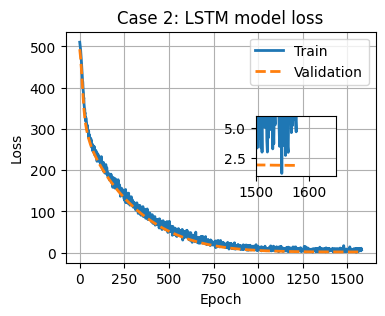

In [77]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 2: LSTM model loss')
# log scale
#plt.yscale('log')

# add a zoom in epoch 70 to 100
ax = plt.axes([0.6, 0.4, .20, .20])
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
ax.set_ylim(1, 6)
ax.set_xlim(1500, 1650)


# save history
history_df = pd.DataFrame(history.history)
history_df.to_csv('case2_history_lstm.csv', index=False)

# save figure
fig = plt.gcf()
fig.savefig('case2_loss_lstm.eps', dpi=300, bbox_inches='tight')


In [69]:
# make predictions
trainPredict = model.predict(input_train_regular_cycle)
testPredict = model.predict(input_test_regular_cycle)
testPredict = np.round(testPredict)

2023-05-25 18:59:44.085104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 18:59:44.086775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 18:59:44.088109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 17ms/step


In [70]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_regular_cycle, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_regular_cycle, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_regular_cycle, testPredict)
print('Test Score: %.2f R2' % (testScore))




Test Score: 2.55 RMSE
Test Score: 2.10 MAE
Test Score: -2.18 R2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


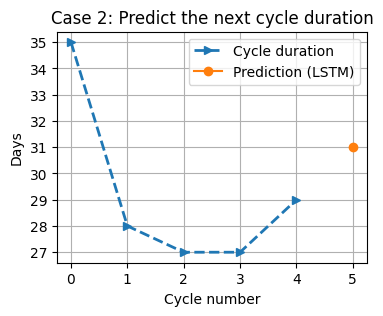

In [78]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_regular_cycle[:,0], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next cycle duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case2_prediction_lstm.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


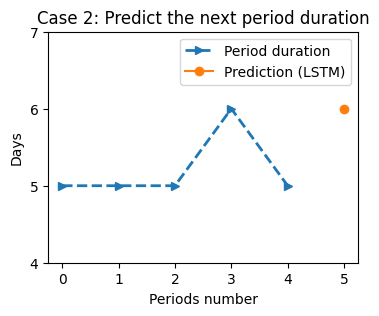

In [79]:
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_regular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 7)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next period duration')
# save figure

fig = plt.gcf()
fig.savefig('case2_prediction_period_lstm.eps', dpi=300, bbox_inches='tight')

In [73]:
# save model 
model.save('case2_lstm_model.h5')